In [16]:
# Install any missing libraries by uncommenting the line below if needed
# !pip install pandas numpy scikit-learn matplotlib seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

**Load and Inspect the Dataset**

In [24]:
data = pd.read_csv('Advertising.csv')  # Replace with the correct path to the dataset
# Inspect the first few rows of the dataset
print(data.head())
# Check for any missing values
print(data.isnull().sum())
# Summary statistics to understand data distribution
print(data.describe())

   Unnamed: 0     TV  Radio  Newspaper  Sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9
Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64
       Unnamed: 0          TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000  200.000000
mean   100.500000  147.042500   23.264000   30.554000   14.022500
std     57.879185   85.854236   14.846809   21.778621    5.217457
min      1.000000    0.700000    0.000000    0.300000    1.600000
25%     50.750000   74.375000    9.975000   12.750000   10.375000
50%    100.500000  149.750000   22.900000   25.750000   12.900000
75%    150.250000  218.825000   36.525000   45.100000   17.400000
max    200.000000  296.400000   49.600000  114.000000   27.000000


# **DATA VISUALIZATION**

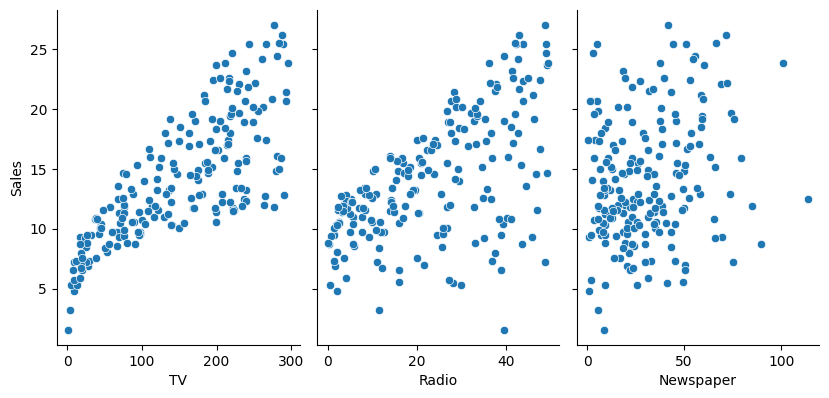

In [20]:
sns.pairplot(data, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', height=4, aspect=0.7)
plt.show()

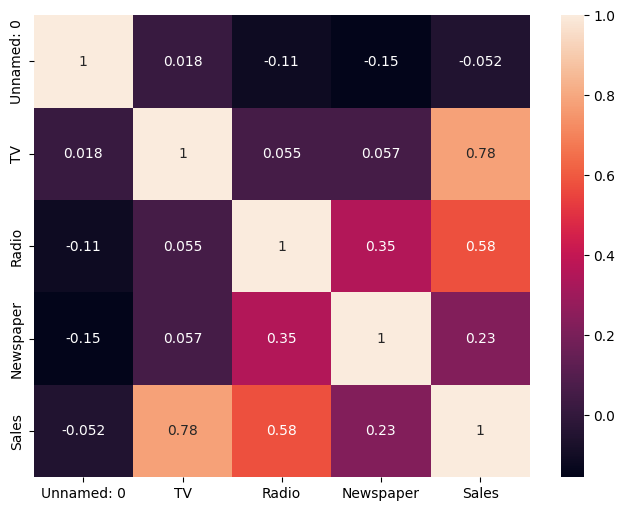

In [21]:
#check for correlations
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(), annot=True)
plt.show()

# **DATA PREPROCESSING**

In [25]:
# Handle any missing values if present (for example, filling with mean)
data = data.fillna(data.mean())

# Define features (X) and target (y)
X = data[['TV', 'Radio', 'Newspaper']]
y = data['Sales']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling using Standard Scaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Training a Random Forest Regressor to Improve Performance**

In [27]:
# Instantiate and train a Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluate the Random Forest model
r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)

print("\nRandom Forest Model")
print("R-squared Score:", r2_rf)
print("Mean Absolute Error (MAE):", mae_rf)
print("Mean Squared Error (MSE):", mse_rf)
print("Root Mean Squared Error (RMSE):", rmse_rf)


Random Forest Model
R-squared Score: 0.9812750924472915
Mean Absolute Error (MAE): 0.6207249999999989
Mean Squared Error (MSE): 0.5910253749999989
Root Mean Squared Error (RMSE): 0.7687817473119395


**FEATURE ENGINEERING**

In [30]:
# Add interaction terms between the advertising channels
data['TV_Radio'] = data['TV'] * data['Radio']
data['TV_Newspaper'] = data['TV'] * data['Newspaper']
data['Radio_Newspaper'] = data['Radio'] * data['Newspaper']

# Define features and target
X = data[['TV', 'Radio', 'Newspaper', 'TV_Radio', 'TV_Newspaper', 'Radio_Newspaper']]
y = data['Sales']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
# The error was on this line. You were trying to transform X_test_scaled
# which was already scaled and had only 3 features.
# Instead, we need to transform X_test which has 6 features.
X_test_scaled = scaler.transform(X_test)

**Hyperparameter Tuning for Random Forest**

In [32]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Instantiate GridSearchCV with RandomForestRegressor
grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    scoring='neg_mean_squared_error'
)

# Fit GridSearchCV
grid_search.fit(X_train_scaled, y_train)

# Best parameters
print("Best parameters from GridSearchCV:", grid_search.best_params_)

# Train model with best parameters
best_rf_model = grid_search.best_estimator_
y_pred_best_rf = best_rf_model.predict(X_test_scaled)

# Evaluate the model
r2_best_rf = r2_score(y_test, y_pred_best_rf)
mae_best_rf = mean_absolute_error(y_test, y_pred_best_rf)
mse_best_rf = mean_squared_error(y_test, y_pred_best_rf)
rmse_best_rf = np.sqrt(mse_best_rf)

print("\nRandom Forest with Best Hyperparameters")
print("R-squared Score:", r2_best_rf)
print("Mean Absolute Error (MAE):", mae_best_rf)
print("Mean Squared Error (MSE):", mse_best_rf)
print("Root Mean Squared Error (RMSE):", rmse_best_rf)


Best parameters from GridSearchCV: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}

Random Forest with Best Hyperparameters
R-squared Score: 0.9893685284097401
Mean Absolute Error (MAE): 0.44361193709068997
Mean Squared Error (MSE): 0.3355674502396293
Root Mean Squared Error (RMSE): 0.5792818400740949


**Plotting Actual vs Predicted Sales for Random Forest**

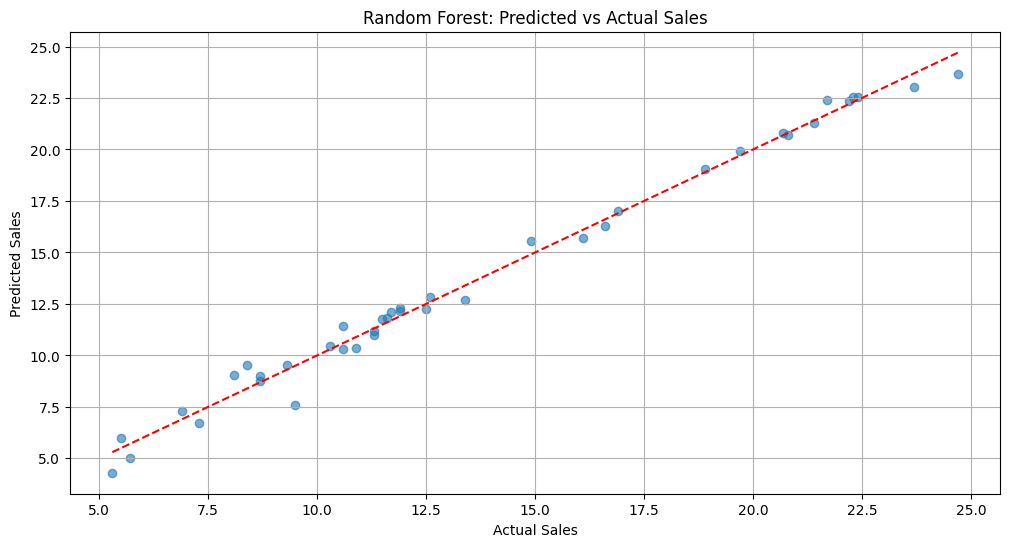

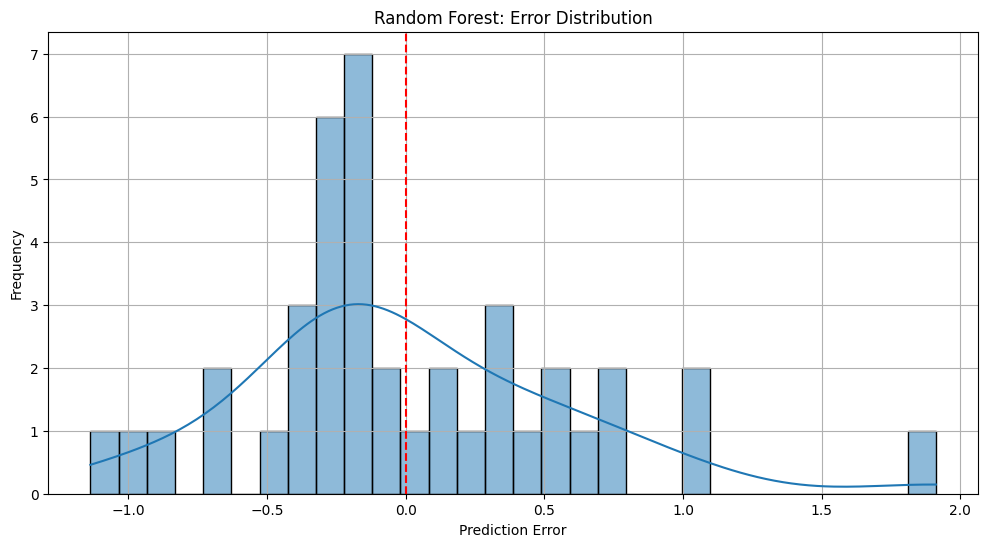

In [36]:
# Plotting Predicted vs Actual Sales
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred_best_rf, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Line for perfect predictions
plt.title('Random Forest: Predicted vs Actual Sales')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.grid()
plt.show()

# Plotting Error Distribution
errors = y_test - y_pred_best_rf

plt.figure(figsize=(12, 6))
sns.histplot(errors, bins=30, kde=True)
plt.title('Random Forest: Error Distribution')
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.grid()
plt.axvline(0, color='red', linestyle='--')  # Line at zero error
plt.show()

